<font color="#138D75">**NERO Winter School training**</font> <br>
**Copyright:** (c) 2025 EUMETSAT <br>
**License:** GPL-3.0-or-later <br>
**Authors:** Andrea Meraner and Dominika Leskow-Czyżewska (EUMETSAT)
# Main script to process all satellite data sources

This script aggregates all satellite data processing scripts into one to allow the quicker and automated generation of all outputs.

In [4]:
import os

# start should be either :00 or :30 minutes to allow the correct retrieval of both MSG and MTG data
start_time = "2024-09-14T00:00:00"
end_time = "2024-09-20T23:59:59"

# Define the latitudes and longitudes of the bounding box
W = -8.8
S = 40.6
E = -7.4
N = 40.9

lonlat_bbox = [W, S, E, N]
lonlat_bbox_str = f"{W}, {S}, {E}, {N}"

run_name = "aveiro_penalva"

output_dir = './ref_data/'

## Imagery

Landsat 8/9 and Sentinel-2

In [10]:
from landsat_sentinel2_img_earthdata_script import main_earthdata

composites_dict = {
    'SWIR-composite': {
        'Sentinel2': ['B12', 'B8A', 'B04'],
        'Landsat89': ['B07', 'B05', 'B04']
    }
}
main_earthdata(start_time, end_time, lonlat_bbox, output_dir, run_name, composites_dict)

Generating SWIR-composite
Preparing ./ref_data/aveiro_penalva/Satellite_Imagery/Landsat-Sentinel2/2024-09-14T111333_SWIR-composite_Landsat89_T29TPF_cropped.tif
./ref_data/aveiro_penalva/Satellite_Imagery/Landsat-Sentinel2/2024-09-14T111333_SWIR-composite_Landsat89_T29TPF_cropped.tif has already been processed and is available in this directory, moving to next file.
Preparing ./ref_data/aveiro_penalva/Satellite_Imagery/Landsat-Sentinel2/2024-09-14T111333_SWIR-composite_Landsat89_T29TNF_cropped.tif
./ref_data/aveiro_penalva/Satellite_Imagery/Landsat-Sentinel2/2024-09-14T111333_SWIR-composite_Landsat89_T29TNF_cropped.tif has already been processed and is available in this directory, moving to next file.
Preparing ./ref_data/aveiro_penalva/Satellite_Imagery/Landsat-Sentinel2/2024-09-14T111357_SWIR-composite_Landsat89_T29TPE_cropped.tif
Cropped
Processed file 3 of 18
Preparing ./ref_data/aveiro_penalva/Satellite_Imagery/Landsat-Sentinel2/2024-09-14T111357_SWIR-composite_Landsat89_T29TNE_cro

Sentinel-2 (full-res but daily)

In [ ]:
from sentinel2_openeo_script import main_sentinel2

bands = ["B08", "B04", "B03", "B02", "B12"]
main_sentinel2(start_time, end_time, W, S, E, N, bands, output_dir, run_name)

Sentinel-3

In [ ]:
from sentinel3_imagery_script import main_sentinel3

#main_sentinel3('SLSTR_SOLAR', start_time, end_time, W,S,E,N, output_dir, run_name)
#main_sentinel3('SLSTR_THERMAL', start_time, end_time, W,S,E,N, output_dir, run_name)
main_sentinel3('OLCI', start_time, end_time, W, S, E, N, output_dir, run_name)

FCI imagery

In [ ]:
input_dir = '/tcenas/scratch/andream/fci_data_for_nero/aug_attica/'
remote_files = False
datasets = ['nir_22', 'ir_38', 'fire_temperature', 'true_color']

from fci_satpy_script import main_fci

main_fci(input_dir, datasets, start_time, end_time, lonlat_bbox, output_dir, run_name, remote_files)

## Active Fires

MSG FRP-PIXEL

Initialising processing
Processing new day: 2024-09-14
Processing slot 2024-09-14 00:00:00, found 1 points.
Processing slot 2024-09-14 00:15:00, found 1 points.
No points left after lat-lon filtering in time 2024-09-14 00:30:00, continuing to next time
No points left after lat-lon filtering in time 2024-09-14 00:45:00, continuing to next time
No points left after lat-lon filtering in time 2024-09-14 01:00:00, continuing to next time
No points left after lat-lon filtering in time 2024-09-14 01:15:00, continuing to next time
No points left after lat-lon filtering in time 2024-09-14 01:30:00, continuing to next time
No points left after lat-lon filtering in time 2024-09-14 01:45:00, continuing to next time
No points left after lat-lon filtering in time 2024-09-14 02:00:00, continuing to next time
No points left after lat-lon filtering in time 2024-09-14 02:15:00, continuing to next time
No points left after lat-lon filtering in time 2024-09-14 02:30:00, continuing to next time
No points l

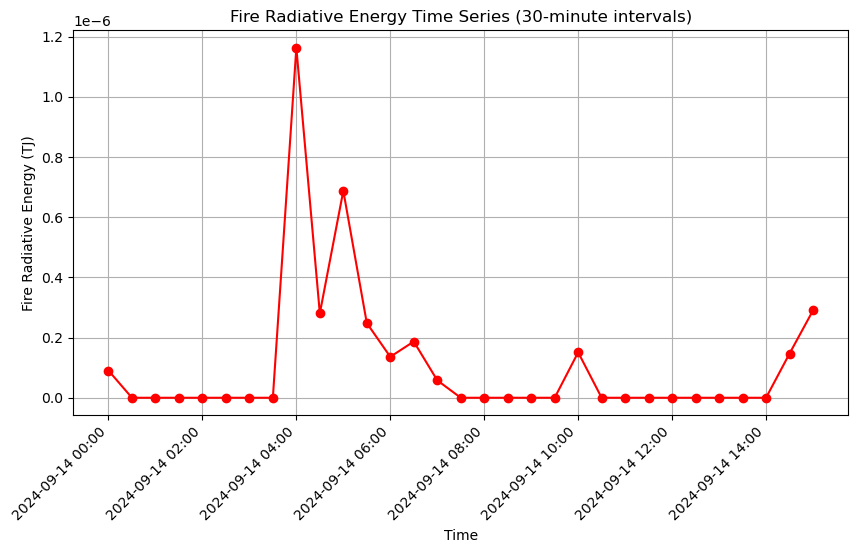

Processing new day: 2024-09-15
No points left after lat-lon filtering in time 2024-09-15 00:00:00, continuing to next time
No points left after lat-lon filtering in time 2024-09-15 00:15:00, continuing to next time
No points left after lat-lon filtering in time 2024-09-15 00:30:00, continuing to next time
No points left after lat-lon filtering in time 2024-09-15 00:45:00, continuing to next time
No points left after lat-lon filtering in time 2024-09-15 01:00:00, continuing to next time
No points left after lat-lon filtering in time 2024-09-15 01:15:00, continuing to next time
Processing slot 2024-09-15 01:30:00, found 1 points.
Processing slot 2024-09-15 01:45:00, found 2 points.
Processing slot 2024-09-15 02:00:00, found 1 points.
Processing slot 2024-09-15 02:15:00, found 2 points.
No points left after lat-lon filtering in time 2024-09-15 02:30:00, continuing to next time
No points left after lat-lon filtering in time 2024-09-15 02:45:00, continuing to next time
Processing slot 2024-

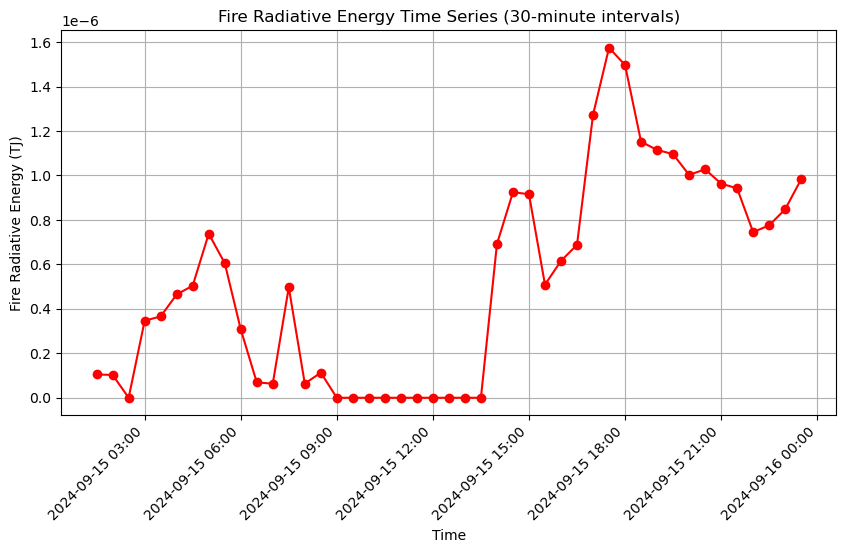

Processing new day: 2024-09-16
Processing slot 2024-09-16 00:00:00, found 9 points.
Processing slot 2024-09-16 00:15:00, found 10 points.
Processing slot 2024-09-16 00:30:00, found 9 points.
Processing slot 2024-09-16 00:45:00, found 7 points.
Processing slot 2024-09-16 01:00:00, found 10 points.
Processing slot 2024-09-16 01:15:00, found 9 points.
Processing slot 2024-09-16 01:30:00, found 7 points.
Processing slot 2024-09-16 01:45:00, found 7 points.
Processing slot 2024-09-16 02:00:00, found 7 points.
Processing slot 2024-09-16 02:15:00, found 10 points.
Processing slot 2024-09-16 02:30:00, found 7 points.
Processing slot 2024-09-16 02:45:00, found 11 points.
Processing slot 2024-09-16 03:00:00, found 9 points.
Processing slot 2024-09-16 03:15:00, found 9 points.
Processing slot 2024-09-16 03:30:00, found 8 points.
Processing slot 2024-09-16 03:45:00, found 12 points.
Processing slot 2024-09-16 04:00:00, found 12 points.
Processing slot 2024-09-16 04:15:00, found 15 points.
Processi

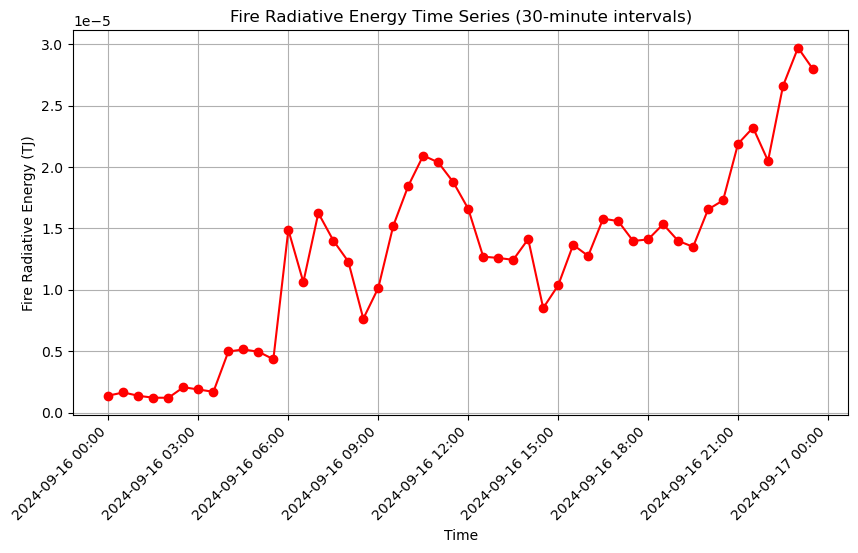

Processing new day: 2024-09-17
Processing slot 2024-09-17 00:00:00, found 34 points.
Processing slot 2024-09-17 00:15:00, found 46 points.
Processing slot 2024-09-17 00:30:00, found 45 points.
Processing slot 2024-09-17 00:45:00, found 43 points.
Processing slot 2024-09-17 01:00:00, found 49 points.
Processing slot 2024-09-17 01:15:00, found 39 points.
Processing slot 2024-09-17 01:30:00, found 31 points.
Processing slot 2024-09-17 01:45:00, found 45 points.
Processing slot 2024-09-17 02:00:00, found 38 points.
Processing slot 2024-09-17 02:15:00, found 46 points.
Processing slot 2024-09-17 02:30:00, found 36 points.
Processing slot 2024-09-17 02:45:00, found 49 points.
Processing slot 2024-09-17 03:00:00, found 46 points.
Processing slot 2024-09-17 03:15:00, found 43 points.
Processing slot 2024-09-17 03:30:00, found 29 points.
Processing slot 2024-09-17 03:45:00, found 40 points.
Processing slot 2024-09-17 04:00:00, found 47 points.
Processing slot 2024-09-17 04:15:00, found 44 point

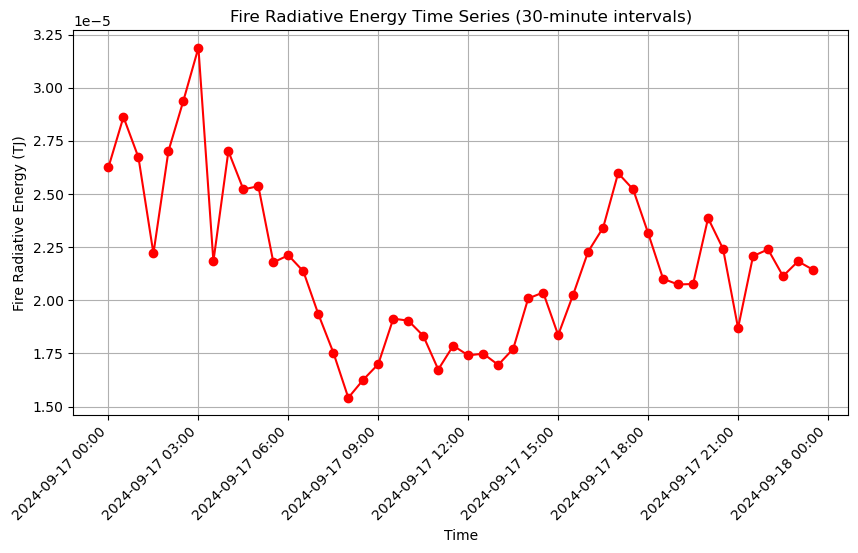

Processing new day: 2024-09-18
Processing slot 2024-09-18 00:00:00, found 45 points.
Processing slot 2024-09-18 00:15:00, found 47 points.
Processing slot 2024-09-18 00:30:00, found 46 points.
Processing slot 2024-09-18 00:45:00, found 46 points.
Processing slot 2024-09-18 01:00:00, found 47 points.
Processing slot 2024-09-18 01:15:00, found 44 points.
Processing slot 2024-09-18 01:30:00, found 46 points.
Processing slot 2024-09-18 01:45:00, found 49 points.
Processing slot 2024-09-18 02:00:00, found 44 points.
Processing slot 2024-09-18 02:15:00, found 42 points.
Processing slot 2024-09-18 02:30:00, found 45 points.
Processing slot 2024-09-18 02:45:00, found 38 points.
Processing slot 2024-09-18 03:00:00, found 39 points.
Processing slot 2024-09-18 03:15:00, found 41 points.
Processing slot 2024-09-18 03:30:00, found 39 points.
Processing slot 2024-09-18 03:45:00, found 36 points.
Processing slot 2024-09-18 04:00:00, found 38 points.
Processing slot 2024-09-18 04:15:00, found 42 point

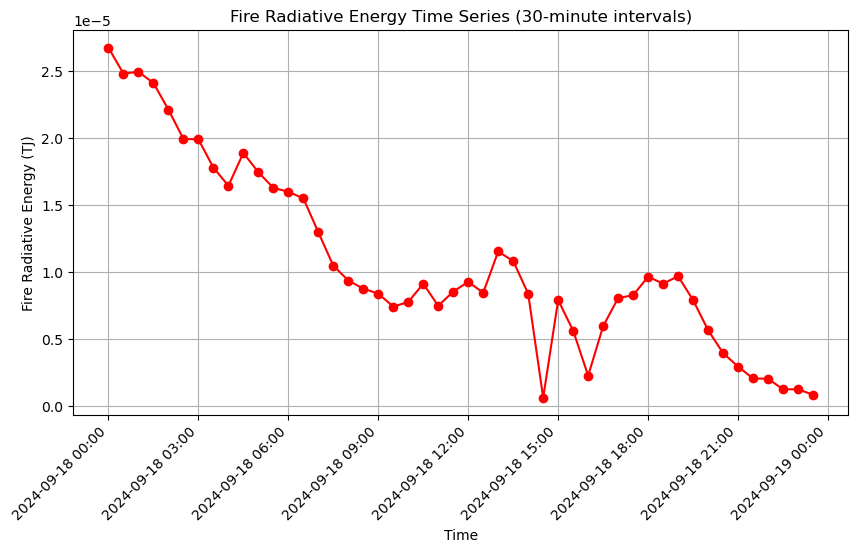

Processing new day: 2024-09-19
Processing slot 2024-09-19 00:00:00, found 11 points.
Processing slot 2024-09-19 00:15:00, found 10 points.
Processing slot 2024-09-19 00:30:00, found 12 points.
Processing slot 2024-09-19 00:45:00, found 11 points.
Processing slot 2024-09-19 01:00:00, found 9 points.
Processing slot 2024-09-19 01:15:00, found 12 points.
Processing slot 2024-09-19 01:30:00, found 8 points.
Processing slot 2024-09-19 01:45:00, found 11 points.
Processing slot 2024-09-19 02:00:00, found 7 points.
Processing slot 2024-09-19 02:15:00, found 7 points.
Processing slot 2024-09-19 02:30:00, found 7 points.
Processing slot 2024-09-19 02:45:00, found 8 points.
Processing slot 2024-09-19 03:00:00, found 9 points.
Processing slot 2024-09-19 03:15:00, found 9 points.
Processing slot 2024-09-19 03:30:00, found 8 points.
Processing slot 2024-09-19 03:45:00, found 5 points.
Processing slot 2024-09-19 04:00:00, found 5 points.
Processing slot 2024-09-19 04:15:00, found 4 points.
Processin

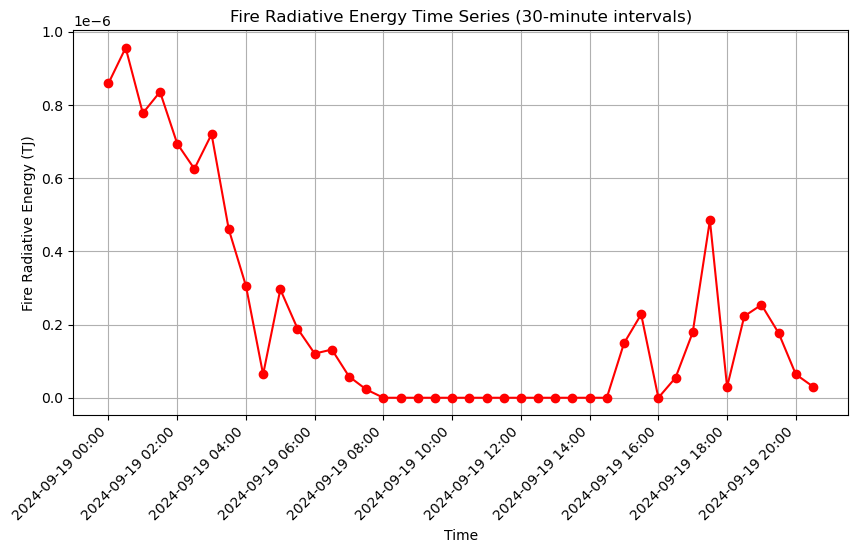

Processing new day: 2024-09-20
No points left after lat-lon filtering in time 2024-09-20 00:00:00, continuing to next time
No points left after lat-lon filtering in time 2024-09-20 00:15:00, continuing to next time
No points left after lat-lon filtering in time 2024-09-20 00:30:00, continuing to next time
No points left after lat-lon filtering in time 2024-09-20 00:45:00, continuing to next time
No points left after lat-lon filtering in time 2024-09-20 01:00:00, continuing to next time
No points left after lat-lon filtering in time 2024-09-20 01:15:00, continuing to next time
No points left after lat-lon filtering in time 2024-09-20 01:30:00, continuing to next time
No points left after lat-lon filtering in time 2024-09-20 01:45:00, continuing to next time
No points left after lat-lon filtering in time 2024-09-20 02:00:00, continuing to next time
No points left after lat-lon filtering in time 2024-09-20 02:15:00, continuing to next time
No points left after lat-lon filtering in time 20

In [7]:
from msg_frppixel_script import main_lsasaf

main_lsasaf(start_time, end_time, lonlat_bbox, output_dir, run_name)

MODIS-VIIRS from FIRMS

In [8]:
from firms_script import main_firms

main_firms(start_time, end_time, lonlat_bbox, output_dir, run_name)


Querying FIRMS for day 2024-09-14
Searching for MODIS data...
No data found for https://firms.modaps.eosdis.nasa.gov/api/area/csv/ff70b2bdd77dbf08d9036ca41a6d5411/MODIS_NRT/-8.8,40.6,-7.4,40.9/1/2024-09-14
No data found for https://firms.modaps.eosdis.nasa.gov/api/area/csv/ff70b2bdd77dbf08d9036ca41a6d5411/MODIS_SP/-8.8,40.6,-7.4,40.9/1/2024-09-14
--> No data found for MODIS on 2024-09-14
Searching for VIIRS data...
No data found for https://firms.modaps.eosdis.nasa.gov/api/area/csv/ff70b2bdd77dbf08d9036ca41a6d5411/VIIRS_SNPP_NRT/-8.8,40.6,-7.4,40.9/1/2024-09-14
No data found for https://firms.modaps.eosdis.nasa.gov/api/area/csv/ff70b2bdd77dbf08d9036ca41a6d5411/VIIRS_NOAA20_NRT/-8.8,40.6,-7.4,40.9/1/2024-09-14
No data found for https://firms.modaps.eosdis.nasa.gov/api/area/csv/ff70b2bdd77dbf08d9036ca41a6d5411/VIIRS_NOAA21_NRT/-8.8,40.6,-7.4,40.9/1/2024-09-14
No data found for https://firms.modaps.eosdis.nasa.gov/api/area/csv/ff70b2bdd77dbf08d9036ca41a6d5411/VIIRS_SNPP_SP/-8.8,40.6,-7.4

Sentinel-3

In [9]:

from sentinel3_fire_script import main_sentinel3_frp

main_sentinel3_frp(start_time, end_time, lonlat_bbox_str, output_dir, run_name)

This token 'ee57eb79-e740-36c6-bdbf-0922001cda00' expires 2025-02-17 23:02:08.279408
SLSTR Level 2 Fire Radiative Power - Sentinel 3
S3B_SL_2_FRP____20240920T223340_20240920T223840_20240921T005843_0299_097_372______MAR_O_NR_003.SEN3
S3A_SL_2_FRP____20240920T213142_20240920T213642_20240920T235822_0299_117_129______MAR_O_NR_003.SEN3
S3B_SL_2_FRP____20240920T111355_20240920T111855_20240920T131613_0299_097_365______MAR_O_NR_003.SEN3
S3A_SL_2_FRP____20240920T101201_20240920T101701_20240920T121647_0299_117_122______MAR_O_NR_003.SEN3
S3A_SL_2_FRP____20240919T215744_20240919T220244_20240920T002501_0299_117_115______MAR_O_NR_003.SEN3
S3A_SL_2_FRP____20240919T103807_20240919T104307_20240919T124244_0299_117_108______MAR_O_NR_003.SEN3
S3A_SL_2_FRP____20240918T222347_20240918T222847_20240919T005134_0299_117_101______MAR_O_NR_003.SEN3
S3B_SL_2_FRP____20240918T214513_20240918T215013_20240919T001049_0299_097_343______MAR_O_NR_003.SEN3
S3A_SL_2_FRP____20240918T110407_20240918T110907_20240918T130842_029

/tcenas/home/andream/src/nero-winter-school-2025/sentinel3_fire_script.py:133: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  big_gdf = pd.concat(gdfs, ignore_index=True)
/tcenas/home/andream/src/nero-winter-school-2025/sentinel3_fire_script.py:141: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  big_gdf.to_file(shapefile_path, driver='ESRI Shapefile')
/tcenas/home/andream/anaconda3/envs/devenv/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'used_channel' to 'used_chann'
  ogr_write(
/tcenas/home/andream/anaconda3/envs/devenv/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'MWIR_confidence

### Zip the outputs
At last, zip the output for easier download

In [ ]:
from tools import zip_output_folder

folder_to_zip = os.path.join(output_dir, run_name)
output_zip_filename = os.path.join(output_dir, f"{run_name}.zip")  # or input a manual name

zip_output_folder(folder_to_zip, output_zip_filename)